# 고금계 과제 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

from fndata import FnStockData
from fndata import FnMarketData

In [2]:
CWD = Path('.').resolve()
DATA_DIR = CWD / 'data'

In [3]:
fndata_path = DATA_DIR / '고금계과제1_v3.3_201301-202408.csv'
mkt_path = DATA_DIR / '고금계과제_시장수익률_201301-202408.csv'
rf_path = DATA_DIR / '통안채1년물_월평균_201301-202408.csv'

## 0. 데이터 전처리

In [4]:
fn = FnStockData(fndata_path)
df = fn.get_data()
df

Item Name          FnGuide Sector 거래정지여부 관리종목여부  기말발행주식수 (보통)(주)  \
date       Symbol                                                  
2013-01-31 A000020             의료     정상     정상       27931470.0   
           A000040          경기소비재     정상     정상      119341379.0   
           A000050          경기소비재     정상     정상        2492298.0   
           A000070            산업재     정상     정상        7704997.0   
           A000080          필수소비재     정상     정상       69477714.0   
...                           ...    ...    ...              ...   
2024-09-19 A037950             IT     정상     정상       84447519.0   
           A038880             IT     정상     정상      315334702.0   
           A001260            산업재     정상     정상        9832571.0   
           A019660          필수소비재     정상     정상       34790746.0   
           A023460          경기소비재     정상     정상       37200000.0   

Item Name                매출액(천원)      매출원가(천원)   보통주자본금(천원)  수익률 (1개월)(%)  \
date       Symbol                                                           
2013-01-31 A000020  2.202406e+08  1.165344e+08   27931470.0         -0.17   
           A000040  9.955327e+07  9.199679e+07   59670690.0          0.20   
           A000050  3.471896e+08  2.514682e+08   12461490.0         -3.46   
           A000070  2.329145e+09  2.025952e+09   40852325.0         -4.51   
           A000080  1.897469e+09  1.074666e+09  363168055.0          5.26   
...                          ...           ...          ...           ...   
2024-09-19 A037950           NaN           NaN          NaN         -9.10   
           A038880           NaN           NaN          NaN        -16.03   
           A001260           NaN           NaN          NaN         -5.37   
           A019660           NaN           NaN          NaN         -1.84   
           A023460           NaN           NaN          NaN        -12.39   

Item Name           수정계수  수정주가(원)     영업이익(천원)  이연법인세부채(천원)    이익잉여금(천원)  \
date       Symbol                                                          
2013-01-31 A000020   1.0   6030.0    2062220.0          0.0  170147330.0   
           A000040   1.0   8727.0   -3486600.0    7181340.0    1298918.0   
           A000050   1.0   7874.0   36031739.0   90652345.0  612310562.0   
           A000070   1.0  67800.0    2472122.0  110818108.0  871019983.0   
           A000080   1.0  32000.0  161051461.0   23405084.0  422540903.0   
...                  ...      ...          ...          ...          ...   
2024-09-19 A037950   1.0   1198.0          NaN          NaN          NaN   
           A038880   1.0    220.0          NaN          NaN          NaN   
           A001260   1.0   6350.0          NaN          NaN          NaN   
           A019660   1.0    588.0          NaN          NaN          NaN   
           A023460   1.0    410.0          NaN          NaN          NaN   

Item Name             이자비용(천원)     자기주식(천원)    자본잉여금(천원)    종가(원)  \
date       Symbol                                                   
2013-01-31 A000020    384335.0          0.0   26919758.0   6030.0   
           A000040    813333.0      -5044.0    3884892.0    495.0   
           A000050  13944625.0          0.0   13991400.0  86500.0   
           A000070  17176000.0   -9982000.0  355855971.0  67800.0   
           A000080  56438096.0 -122693570.0  709299321.0  32000.0   
...                        ...          ...          ...      ...   
2024-09-19 A037950         NaN          NaN          NaN   1198.0   
           A038880         NaN          NaN          NaN    220.0   
           A001260         NaN          NaN          NaN   6350.0   
           A019660         NaN          NaN          NaN    588.0   
           A023460         NaN          NaN          NaN    410.0   

Item Name                총자산(천원)  
date       Symbol                 
2013-01-31 A000020  3.161655e+08  
           A000040  1.169316e+08  
           A000050  1.296989e+09  
           A000070  2.595068e+09  
           A0000

In [5]:
fnmkt = FnMarketData(mkt_path)
df_mkt = fnmkt.get_data()
df_mkt

Item Name               수익률 (1개월)(%)
date       Symbol Name              
2013-01-31 MKF2000           -0.0162
           KRX 300           -0.0202
2013-02-28 MKF2000            0.0389
           KRX 300            0.0507
2013-03-31 MKF2000           -0.0074
...                              ...
2024-07-31 KRX 300           -0.0097
2024-08-31 MKF2000           -0.0358
           KRX 300           -0.0347
2024-09-20 MKF2000           -0.0610
           KRX 300           -0.0640

[282 rows x 1 columns]

In [6]:
df_rf = pd.read_csv(rf_path)
df_rf.columns = ['date', 'rf']
df_rf['date'] = pd.to_datetime(df_rf['date'], format='%Y/%m') + pd.offsets.MonthEnd(0) # 말일로 변경
df_rf.set_index('date', inplace=True)
df_rf['rf'] = (1 + (df_rf['rf']/100)) ** (1/12) - 1 # 연율화
df_rf

,rf
date,
2013-01-31,0.002239
2013-02-28,0.002214
2013-03-31,0.002149
2013-04-30,0.002125
2013-05-31,0.002125
...,...
2024-04-30,0.002781
2024-05-31,0.002780
2024-06-30,0.002751


# 1. Factor Construction

## 1.1 MKT-RF
- MKT : MKT2000
- RF : 통안채1년물_월평균

In [7]:
df_mkt = df_mkt.xs('MKF2000', level='Symbol Name')
df_mkt.columns = ['mkt']
df_mkt

,mkt
date,
2013-01-31,-0.0162
2013-02-28,0.0389
2013-03-31,-0.0074
2013-04-30,-0.0219
2013-05-31,0.0233
...,...
2024-05-31,-0.0200
2024-06-30,0.0271
2024-07-31,-0.0155


In [8]:
df_mkt_rf= pd.concat([df_mkt, df_rf], axis=1)
df_mkt_rf['mkt_rf'] = df_mkt_rf['mkt'] - df_mkt_rf['rf']

In [9]:
df['수익률 (1개월)(%)'] = df['수익률 (1개월)(%)'] * 0.01 # 퍼센트를 소수로 변경
df['excess_rets'] = df['수익률 (1개월)(%)'] - df_rf['rf'] # 2024-09-19 빼고는 존재함

## 1.2. SMB
- 시장가치 : t년 12월 말의 보통주 주가에 발행주식을 곱해 측정한다.
- 자기자본의 장부가치: t-1년 12월말의 보통주 자본금에 자본잉여금, 이익잉여금, 자기주식, 이연법인세 부채를 더해 측정
- 장부가치 대 시장가치 비율(B/Mi=Bi/(PiXNi))는 자기자본의 장부가치를 시장가치로 나눈다.

> 주의) 각 시점마다 independent sort

In [10]:
# 종가가 없으면 거래가 되지 않았다고 판단하여 nan
df['시가총액'] = df['종가(원)'] * df['기말발행주식수 (보통)(주)']

In [11]:
df['size_quantiles'] = df.groupby('date')['시가총액'].transform(lambda x: pd.qcut(x, 2, labels=['Small', 'Big']))
df['size_quantiles']

date        Symbol 
2013-01-31  A000020      Big
            A000040    Small
            A000050      Big
            A000070      Big
            A000080      Big
                       ...  
2024-09-19  A037950    Small
            A038880    Small
            A001260    Small
            A019660    Small
            A023460    Small
Name: size_quantiles, Length: 354770, dtype: category
Categories (2, object): ['Small' < 'Big']

In [12]:
df['Book'] = df['보통주자본금(천원)'].fillna(0) + df['자본잉여금(천원)'].fillna(0) + df['이익잉여금(천원)'].fillna(0) - df['자기주식(천원)'].fillna(0) + df['이연법인세부채(천원)'].fillna(0)
df['BM'] = df['Book'] / df['시가총액']

In [13]:
def qcut_BM(x):
    try:
        return pd.qcut(x, 3, labels=['Low', 'Mid', 'High'])
    except ValueError:  # 구간을 나눌 수 없는 경우
        return pd.Series(np.nan, index=x.index)
df['bm_quantiles'] = df.groupby('date')['BM'].transform(qcut_BM)
df['bm_quantiles']

date        Symbol 
2013-01-31  A000020     Mid
            A000040     Mid
            A000050    High
            A000070    High
            A000080     Low
                       ... 
2024-09-19  A037950     NaN
            A038880     NaN
            A001260     NaN
            A019660     NaN
            A023460     NaN
Name: bm_quantiles, Length: 354770, dtype: object

In [14]:
df_smb = df.groupby(['date', 'size_quantiles', 'bm_quantiles'])['수익률 (1개월)(%)'].mean().unstack(['size_quantiles', 'bm_quantiles'])
small_avg = df_smb[('Small', 'Low')] + df_smb[('Small', 'Mid')] + df_smb[('Small', 'High')]
big_avg = df_smb[('Big', 'Low')] + df_smb[('Big', 'Mid')] + df_smb[('Big', 'High')]

smb = (small_avg / 3) - (big_avg / 3)
smb

C:\Users\chlje\AppData\Local\Temp\ipykernel_43240\1424464171.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_smb = df.groupby(['date', 'size_quantiles', 'bm_quantiles'])['수익률 (1개월)(%)'].mean().unstack(['size_quantiles', 'bm_quantiles'])


date
2013-01-31    0.023134
2013-02-28   -0.019688
2013-03-31   -0.015721
2013-04-30   -0.014737
2013-05-31    0.025274
                ...   
2024-05-31         NaN
2024-06-30         NaN
2024-07-31         NaN
2024-08-31         NaN
2024-09-19         NaN
Length: 141, dtype: float64

## 1.3 HML

In [15]:
df_hml = df.groupby(['date', 'size_quantiles', 'bm_quantiles'])['수익률 (1개월)(%)'].mean().unstack(['size_quantiles', 'bm_quantiles'])

high_hml = df_hml[('Small', 'High')] + df_hml[('Big', 'High')]
low_hml = df_hml[('Small', 'Low')] + df_hml[('Big', 'Low')]

hml = (high_hml - low_hml) / 2
hml

C:\Users\chlje\AppData\Local\Temp\ipykernel_43240\106583270.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hml = df.groupby(['date', 'size_quantiles', 'bm_quantiles'])['수익률 (1개월)(%)'].mean().unstack(['size_quantiles', 'bm_quantiles'])


date
2013-01-31   -0.038700
2013-02-28   -0.031030
2013-03-31   -0.004063
2013-04-30   -0.027508
2013-05-31   -0.006466
                ...   
2024-05-31         NaN
2024-06-30         NaN
2024-07-31         NaN
2024-08-31         NaN
2024-09-19         NaN
Length: 141, dtype: float64

## 1.4 RMW
- t-1년 12말의 매출액에서 매출원가, 이자비용, 판매및관리비를 차감한 영업이익을 t-1년 12월 말의 보통주 (자기자본) 장부가치로 나누어 측정

In [16]:
df['OP'] = df['영업이익(천원)'].fillna(0) / df['Book']

In [17]:
def qcut_OP(x):
    try:
        return pd.qcut(x, [0, 0.3, 0.7, 1.0], labels=['Weak', 'Neutral', 'Robust'])
    except ValueError:  # 구간을 나눌 수 없는 경우
        return pd.Series(np.nan, index=x.index)
df['OP_quantiles'] = df.groupby('date')['OP'].transform(qcut_OP)
df['OP_quantiles']

date        Symbol 
2013-01-31  A000020       Weak
            A000040       Weak
            A000050    Neutral
            A000070       Weak
            A000080    Neutral
                        ...   
2024-09-19  A037950        NaN
            A038880        NaN
            A001260        NaN
            A019660        NaN
            A023460        NaN
Name: OP_quantiles, Length: 354770, dtype: object

In [18]:
df_rmv = df.groupby(['date', 'size_quantiles', 'OP_quantiles'])['수익률 (1개월)(%)'].mean().unstack(['size_quantiles', 'OP_quantiles'])

high_rmw = df_rmv[('Small', 'Robust')] + df_rmv[('Big', 'Robust')]
low_rmw = df_rmv[('Small', 'Weak')] + df_rmv[('Big', 'Weak')]

rmw = (high_rmw - low_rmw) / 2
rmw

C:\Users\chlje\AppData\Local\Temp\ipykernel_43240\2258625437.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_rmv = df.groupby(['date', 'size_quantiles', 'OP_quantiles'])['수익률 (1개월)(%)'].mean().unstack(['size_quantiles', 'OP_quantiles'])


date
2013-01-31   -0.028589
2013-02-28    0.044515
2013-03-31    0.055179
2013-04-30    0.054402
2013-05-31    0.018818
                ...   
2024-05-31         NaN
2024-06-30         NaN
2024-07-31         NaN
2024-08-31         NaN
2024-09-19         NaN
Length: 141, dtype: float64

## 1.5 CMA
-  t-1년 12월 말의 총자산에서 t-2년 12월말의 총자산을 차감한 총자산증가액을 t-2년 12월 말의 총자산으로 나누어서 측정.

In [19]:
df['invest'] = df.groupby('date')['총자산(천원)'].transform(lambda x: (x - x.shift(12)) / x.shift(12))

In [20]:
def qcut_invest(x):
    try:
        return pd.qcut(x, [0, 0.3, 0.7, 1.0], labels=['Conservative', 'Neutral', 'Aggressive'])
    except ValueError:  # 구간을 나눌 수 없는 경우
        return pd.Series(np.nan, index=x.index)
df['invest_quantiles'] = df.groupby('date')['invest'].transform(qcut_invest)

In [21]:
cma_data = df.groupby(['date', 'size_quantiles', 'invest_quantiles'])['수익률 (1개월)(%)'].mean().unstack(['size_quantiles', 'invest_quantiles'])

high_invest = cma_data[('Small', 'Aggressive')] + cma_data[('Big', 'Aggressive')]
low_invest = cma_data[('Small', 'Conservative')] + cma_data[('Big', 'Conservative')]

cma = low_invest - high_invest
cma

C:\Users\chlje\AppData\Local\Temp\ipykernel_43240\2209391919.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cma_data = df.groupby(['date', 'size_quantiles', 'invest_quantiles'])['수익률 (1개월)(%)'].mean().unstack(['size_quantiles', 'invest_quantiles'])


date
2013-01-31    0.042257
2013-02-28   -0.009232
2013-03-31    0.042424
2013-04-30    0.042460
2013-05-31    0.009956
                ...   
2024-05-31         NaN
2024-06-30         NaN
2024-07-31         NaN
2024-08-31         NaN
2024-09-19         NaN
Length: 141, dtype: float64

## 1.6 UMD
- (전월말 주가 – 1년전 월말 주가) / 1년전 주가
- 보유기간이 1개월이며, 매월 리밸런싱하며, 상위 30%가 Winner(UP)이며, 하위 30%가 Loser(DOWN)이다.

In [22]:
df['Momentum'] = df.groupby('date')['수정주가(원)'].transform(lambda x: (x - x.shift(12)) / x.shift(12))
df['Momentum_rank'] = df.groupby('date')['Momentum'].transform(lambda x: pd.qcut(x, [0, 0.3, 0.7, 1.0], labels=['Loser', 'Middle', 'Winner']))
umd = df.groupby(['date', 'Momentum_rank'])['수익률 (1개월)(%)'].mean().unstack()
umd['WML'] = umd['Winner'] - umd['Loser']
umd

C:\Users\chlje\AppData\Local\Temp\ipykernel_43240\1672500904.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  umd = df.groupby(['date', 'Momentum_rank'])['수익률 (1개월)(%)'].mean().unstack()


Momentum_rank,Loser,Middle,Winner,WML
date,,,,
2013-01-31,0.047127,0.039701,0.028399,-0.018728
2013-02-28,0.030839,0.047576,0.060817,0.029978
2013-03-31,0.040912,0.046901,0.042751,0.001839
2013-04-30,0.020082,0.043587,0.044057,0.023975
2013-05-31,0.041072,0.048604,0.025107,-0.015965
...,...,...,...,...
2024-05-31,-0.008525,0.005959,0.017160,0.025685
2024-06-30,-0.040485,-0.026069,-0.005843,0.034641
2024-07-31,-0.030708,-0.032036,-0.028670,0.002039


## 1.7 STR
- reversal(최근월의 수익률 기반으로)

In [23]:
df['1M_Return'] = df.groupby('date')['수정주가(원)'].transform(lambda x: x.pct_change())
df['Reversal_rank'] = df.groupby('date')['1M_Return'].transform(lambda x: pd.qcut(x, [0, 0.3, 0.7, 1.0], labels=['Winner', 'Middle', 'Loser']))
str = df.groupby(['date', 'Reversal_rank'])['수익률 (1개월)(%)'].mean().unstack()
str['WML'] = str['Winner'] - str['Loser']
str

C:\Users\chlje\AppData\Local\Temp\ipykernel_43240\420867173.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['1M_Return'] = df.groupby('date')['수정주가(원)'].transform(lambda x: x.pct_change())
C:\Users\chlje\AppData\Local\Temp\ipykernel_43240\420867173.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  str = df.groupby(['date', 'Reversal_rank'])['수익률 (1개월)(%)'].mean().unstack()


Reversal_rank,Winner,Middle,Loser,WML
date,,,,
2013-01-31,0.047489,0.048770,0.029066,0.018424
2013-02-28,0.038416,0.054758,0.054647,-0.016231
2013-03-31,0.045580,0.059333,0.040690,0.004890
2013-04-30,0.030922,0.063349,0.041747,-0.010825
2013-05-31,0.042808,0.064000,0.033100,0.009708
...,...,...,...,...
2024-05-31,-0.001586,0.001621,0.013971,-0.015557
2024-06-30,-0.046560,-0.027509,-0.000102,-0.046458
2024-07-31,-0.028959,-0.036565,-0.030200,0.001241


# 2. Output
## 2.1 output1) 25 size BEME Portfolios

In [24]:
df['size_quantiles_by5'] = pd.qcut(df['시가총액'], 5, labels=['Small', '2', '3', '4', 'Big'])
df['size_quantiles_by5']

date        Symbol 
2013-01-31  A000020        4
            A000040        2
            A000050        4
            A000070      Big
            A000080      Big
                       ...  
2024-09-19  A037950        3
            A038880        2
            A001260        2
            A019660    Small
            A023460    Small
Name: size_quantiles_by5, Length: 354770, dtype: category
Categories (5, object): ['Small' < '2' < '3' < '4' < 'Big']

In [25]:
def qcut_BM_by5(x):
    try:
        return pd.qcut(x, 5, labels=['Low', '2', '3', '4', 'High'])
    except ValueError:  # 구간을 나눌 수 없는 경우
        return pd.Series(np.nan, index=x.index)
df['bm_quantiles_by5'] = df.groupby('date')['BM'].transform(qcut_BM_by5)
df['bm_quantiles_by5']

date        Symbol 
2013-01-31  A000020       4
            A000040       3
            A000050    High
            A000070    High
            A000080       2
                       ... 
2024-09-19  A037950     NaN
            A038880     NaN
            A001260     NaN
            A019660     NaN
            A023460     NaN
Name: bm_quantiles_by5, Length: 354770, dtype: object

In [26]:
portfolios = df.groupby(['date', 'size_quantiles_by5', 'bm_quantiles_by5']).apply(
    lambda group: group['excess_rets'].mean(skipna=True)
    ).unstack(level=['size_quantiles_by5', 'bm_quantiles_by5'])

C:\Users\chlje\AppData\Local\Temp\ipykernel_43240\1464950541.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  portfolios = df.groupby(['date', 'size_quantiles_by5', 'bm_quantiles_by5']).apply(
C:\Users\chlje\AppData\Local\Temp\ipykernel_43240\1464950541.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  portfolios = df.groupby(['date', 'size_quantiles_by5', 'bm_quantiles_by5']).apply(


In [27]:
portfolios  # book value가 2024-06-30까지 존재함

size_quantiles_by5     Small                                          \
bm_quantiles_by5           2         3         4      High       Low   
date                                                                   
2013-01-31          0.077027  0.046255  0.023851  0.032382  0.078073   
2013-02-28          0.065640  0.029286  0.031615  0.007980  0.038113   
2013-03-31          0.006621  0.027378  0.036830  0.026008  0.056202   
2013-04-30          0.033333  0.016949  0.006744 -0.001256  0.056130   
2013-05-31          0.046853  0.047871  0.044515  0.054171  0.035008   
...                      ...       ...       ...       ...       ...   
2023-08-31          0.032677 -0.015502 -0.019885 -0.010544 -0.002557   
2023-09-30         -0.037655 -0.060131 -0.057518 -0.061130 -0.095385   
2023-10-31         -0.100512 -0.087824 -0.084984 -0.082594 -0.113727   
2023-11-30          0.057171  0.046288  0.061960  0.023641 -0.010886   
2023-12-31         -0.028751 -0.004416 -0.010170 -0.010749 -0.014583   

size_quantiles_by5         2                                          ...  \
bm_quantiles_by5           2         3         4      High       Low  ...   
date                                                                  ...   
2013-01-31          0.033848  0.051476  0.016711  0.017647  0.094705  ...   
2013-02-28          0.073478  0.072823  0.031782  0.021257  0.013393  ...   
2013-03-31          0.022247  0.063019  0.056493  0.043574  0.060260  ...   
2013-04-30          0.071727  0.041655  0.045529 -0.006615  0.070779  ...   
2013-05-31          0.047817  0.054014  0.046138  0.026043  0.061146  ...   
...                      ...       ...       ...       ...       ...  ...   
2023-08-31          0.021380  0.020127  0.003207  0.005953  0.056955  ...   
2023-09-30         -0.045261 -0.050441 -0.059415 -0.045826 -0.020147  ...   
2023-10-31         -0.135239 -0.084984 -0.072470 -0.061886 -0.133322  ...   
2023-11-30          0.041141  0.067423  0.056077  0.033170  0.046769  ...   
2023-12-31         -0.002058  0.013422  0.016017 -0.002667  0.042703  ...   

size_quantiles_by5         4                                          \
bm_quantiles_by5           2         3         4      High       Low   
date                                                                   
2013-01-31          0.035642  0.031513  0.009885  0.002572  0.031257   
2013-02-28          0.087771  0.040263  0.049436  0.008761  0.074873   
2013-03-31          0.033059  0.066825  0.053654  0.064586  0.064842   
2013-04-30          0.098319  0.060279  0.073935  0.039907  0.050551   
2013-05-31          0.009194  0.029869  0.003993  0.022932  0.031453   
...                      ...       ...       ...       ...       ...   
2023-08-31          0.030231  0.003348  0.023747 -0.018192  0.084784   
2023-09-30         -0.004047 -0.040235 -0.040046 -0.027956  0.009022   
2023-10-31         -0.095228 -0.064203 -0.080727 -0.049997 -0.141743   
2023-11-30          0.085135  0.065919  0.040305  0.051257  0.099283   
2023-12-31          0.060157  0.047047  0.017486 -0.000913  0.181813   

size_quantiles_by5       Big                                          
bm_quantiles_by5           2         3         4      High       Low  
date                                                                  
2013-01-31         -0.008181 -0.010241 -0.004806  0.010461  0.042365  
2013-02-28          0.041923  0.044094  0.012558  0.040980  0.064836  
2013-03-31          0.033801  0.014216  0.020509  0.017261  0.038235  
2013-04-30          0.062353  0.016352 -0.005816 -0.004896  0.011679  
2013-05-31          0.021929 -0.003261  0.015489  0.018246  0.012079  
...                      ...       ...       ...       ...       ...  
2023-08-31          0.012038  0.009285  0.017510 -0.008644  0.057954  
2023-09-30         -0.019503 -0.009166 -0.000061  0.005855 -0.019233  
2023-10-31         -0.082264 -0.049183 -0.054150 -0.057910 -0.114974  
2023-11-30          0.115667  0.080875  0.069065  0

## 2.2 output 2) Fama-French 3factors

In [28]:
_3factors = pd.DataFrame({
    'Mkt_RF': df_mkt_rf['mkt_rf'],
    'SMB': smb,
    'HML': hml,
    'RF' : df_rf['rf'],
    'UMD': umd['WML']
    })
_3factors.dropna(how='all', inplace=True)
_3factors

,Mkt_RF,SMB,HML,RF,UMD
date,,,,,
2013-01-31,-0.018439,0.023134,-0.038700,0.002239,-0.018728
2013-02-28,0.036686,-0.019688,-0.031030,0.002214,0.029978
2013-03-31,-0.009549,-0.015721,-0.004063,0.002149,0.001839
2013-04-30,-0.024025,-0.014737,-0.027508,0.002125,0.023975
2013-05-31,0.021175,0.025274,-0.006466,0.002125,-0.015965
...,...,...,...,...,...
2024-05-31,-0.022780,NaN,NaN,0.002780,0.025685
2024-06-30,0.024349,NaN,NaN,0.002751,0.034641
2024-07-31,-0.018136,NaN,NaN,0.002636,0.002039


## 2-3 output 3) Fama-French 5Factors

In [29]:
_5factors = pd.DataFrame({
    'Mkt_RF': df_mkt_rf['mkt_rf'],
    'SMB': smb,
    'HML': hml,
    'RMW': rmw,
    'CMA': cma,
    'RF' : df_rf['rf'],
    'UMD': umd['WML'],
    'STR': str['WML']
})
_5factors.dropna(how='all', inplace=True)
_5factors

,Mkt_RF,SMB,HML,RMW,CMA,RF,UMD,STR
date,,,,,,,,
2013-01-31,-0.018439,0.023134,-0.038700,-0.028589,0.042257,0.002239,-0.018728,0.018424
2013-02-28,0.036686,-0.019688,-0.031030,0.044515,-0.009232,0.002214,0.029978,-0.016231
2013-03-31,-0.009549,-0.015721,-0.004063,0.055179,0.042424,0.002149,0.001839,0.004890
2013-04-30,-0.024025,-0.014737,-0.027508,0.054402,0.042460,0.002125,0.023975,-0.010825
2013-05-31,0.021175,0.025274,-0.006466,0.018818,0.009956,0.002125,-0.015965,0.009708
...,...,...,...,...,...,...,...,...
2024-05-31,-0.022780,NaN,NaN,NaN,NaN,0.002780,0.025685,-0.015557
2024-06-30,0.024349,NaN,NaN,NaN,NaN,0.002751,0.034641,-0.046458
2024-07-31,-0.018136,NaN,NaN,NaN,NaN,0.002636,0.002039,0.001241


(재필)

보배 데이터 plot

<Axes: xlabel='date'>

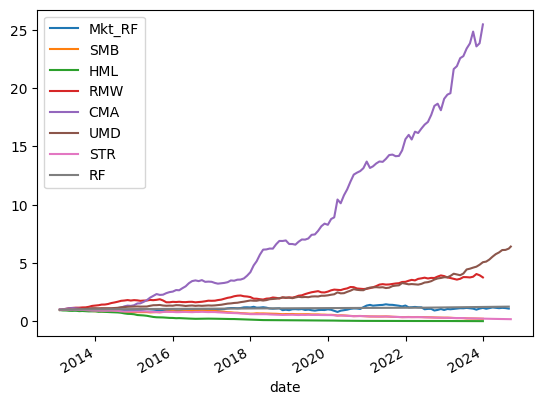

In [33]:
cols = [
    'Mkt_RF',
    'SMB',
    'HML',
    'RMW',
    'CMA',
    'UMD',
    'STR',
    'RF'
]

(_5factors[cols] + 1).cumprod().plot()